<a href="https://colab.research.google.com/github/Evavanrooijen/AfricanGDP/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(1)

def growth_rate(x, steps=1):
  return x[steps:]-x[:-steps]
  
def create_DGP(N, T, alpha, var_eps):
  # Function that takes all necessary parameters and returns a simulated dataset [NxT]
  Y=np.random.rand(N, T)
  for i in range(N):
    Y[i, 0]=0
    theta = np.random.uniform(1, alpha, 1)
    for t in range(1, T):
      epsilon = np.random.normal(0, sqrt(var_eps), 1)
      Y[i, t]=theta+Y[i, t-1]+epsilon

  # unit tests for simulating DGP
  assert np.mean(Y, axis = 0)[0] == 0 # start time series 0 at t=0


  return Y

In [0]:
def split_T1_T2(Y, a):
  T1_size = int((T*a)/(1+a))  

  # T1 = Y[:, 0:(T1_size)] # Rounding when casting float to int
  # T2 = Y[:, (T1_size):T]


  return T1_size

In [0]:
N = 50
T = 100
alpha = 1
var_eps = 0.5

Y, Y_growth  = create_DGP(N, T, alpha, var_eps)

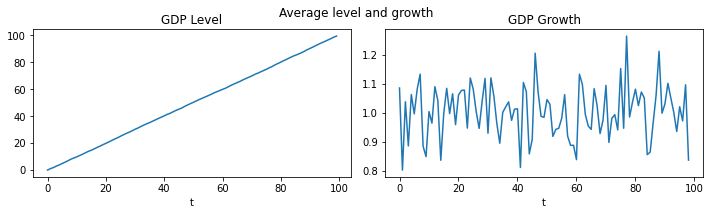

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.suptitle('Average level and growth')
axes[0].plot(np.mean(Y, axis=0))
axes[0].set_title('GDP Level')
axes[0].set_xlabel('t')
axes[1].plot(np.mean(Y_growth, axis=0))
axes[1].set_title('GDP Growth')
axes[1].set_xlabel('t')
fig.tight_layout()

In [0]:
T1, T2, T1_size = split_T1_T2(Y, Y_growth, a = 2)

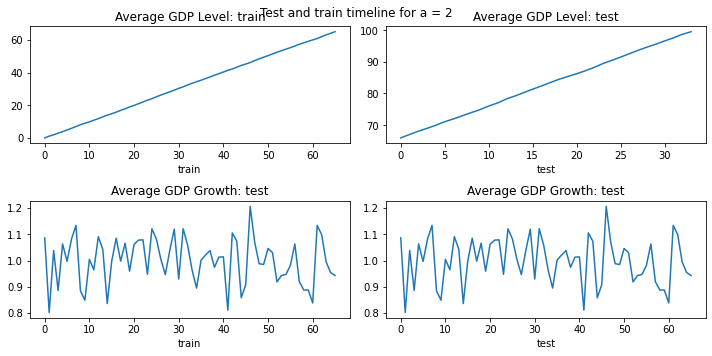

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.suptitle('Test and train timeline for a = 2')
axes[0, 0].plot(np.mean(Y, axis=0)[:T1_size])
axes[0, 0].set_title('Average GDP Level: train')
axes[0, 0].set_xlabel('train')
axes[1, 0].plot(np.mean(Y_growth, axis=0)[:T1_size])
axes[1, 0].set_title('Average GDP Growth: test')
axes[1, 0].set_xlabel('train')
axes[0, 1].plot(np.mean(Y, axis=0)[T1_size:])
axes[0, 1].set_title('Average GDP Level: test')
axes[0, 1].set_xlabel('test')
axes[1, 1].plot(np.mean(Y_growth, axis=0)[:T1_size])
axes[1, 1].set_title('Average GDP Growth: test')
axes[1, 1].set_xlabel('test')

fig.tight_layout()